In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from os import chdir 
from tqdm import tqdm
from glob import glob
from pathlib import Path

from os import chdir 
chdir('C:\\Users\\afeki\\Desktop\\Code\\BootStrapDesicionTree\\')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
N_ROWS = 10**3
Y_COL_NAME = 'y'

MAX_DEPTH = 4
N_ESTIMATORS = 100
LEARNING_RATE = 0.1

## Data Generation

In [3]:
def model_a():
    def score(row):
        if row['fever'] == 1 and row['cough'] == 1:
            return 80
        return 0
    X = pd.DataFrame()
    X['fever'] = np.random.randint(0,2,N_ROWS)
    X['cough'] = np.random.randint(0,2,N_ROWS)
    y = X.apply(score, axis = 1)
    return X,y


def model_b():
    def score(row):
        if row['cough'] == 1:
            if row['fever'] == 1:
                return 90
            else:
                return 10
        return 0
    X = pd.DataFrame()
    X['fever'] = np.random.randint(0,2,N_ROWS)
    X['cough'] = np.random.randint(0,2,N_ROWS)
    y = X.apply(score, axis = 1)
    return X,y


   

# Regular model
## Model A

In [4]:
from Tree.tree import CartRegressionTree, CartRegressionTreeKFold
from Tree.tree_feature_importance import weighted_variance_reduction_feature_importance
from Tree.tree_visualizer import TreeVisualizer

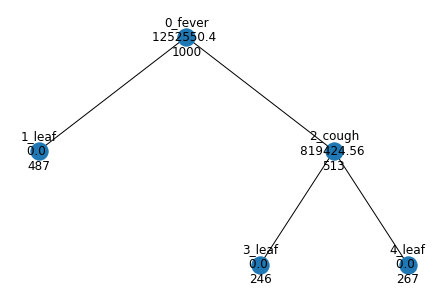

fever    0.345795
cough    0.654205
dtype: float64


In [6]:
X,y = model_a()
X[Y_COL_NAME] = y

tree = CartRegressionTree(Y_COL_NAME, max_depth= 3)
tree.build(X)
tree_vis = TreeVisualizer()
tree_vis.plot(tree.root)
fi = weighted_variance_reduction_feature_importance(tree)
print(pd.Series(fi)/pd.Series(fi).sum())

## Model B

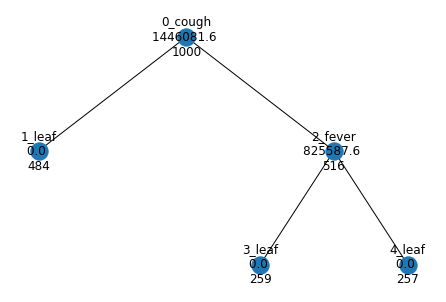

fever    0.570914
cough    0.429086
dtype: float64


In [7]:
X,y = model_b()
X[Y_COL_NAME] = y

tree = CartRegressionTree(Y_COL_NAME, max_depth= 3)
tree.build(X)
tree_vis = TreeVisualizer()
tree_vis.plot(tree.root)
fi = weighted_variance_reduction_feature_importance(tree)
print(pd.Series(fi)/pd.Series(fi).sum())

# Kfold
## Model A

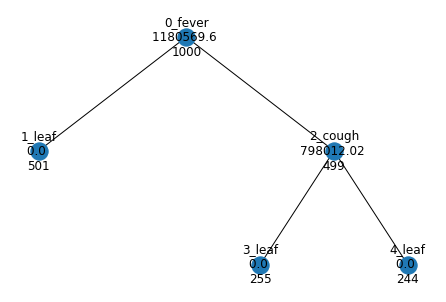

fever    0.324045
cough    0.675955
dtype: float64


In [13]:
X,y = model_a()
X[Y_COL_NAME] = y

tree = CartRegressionTreeKFold(Y_COL_NAME, max_depth= 3)
tree.build(X)
tree_vis = TreeVisualizer()
tree_vis.plot(tree.root)
fi = weighted_variance_reduction_feature_importance(tree)
print(pd.Series(fi)/pd.Series(fi).sum())

## Model b

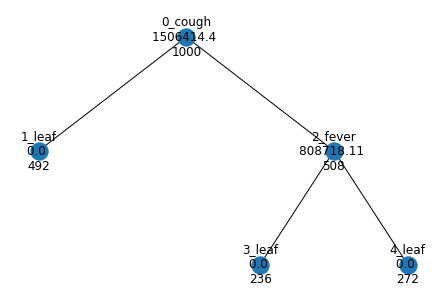

fever    0.53685
cough    0.46315
dtype: float64


In [15]:
X,y = model_b()
X[Y_COL_NAME] = y

tree = CartRegressionTreeKFold(Y_COL_NAME, max_depth= 3)
tree.build(X)
tree_vis = TreeVisualizer()
tree_vis.plot(tree.root)
fi = weighted_variance_reduction_feature_importance(tree)
print(pd.Series(fi)/pd.Series(fi).sum())